In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("../data_raw/train.csv")
df.head()



,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [3]:
# Function to extract numeric portion
def extract_num(col):
    return col.astype(str).str.extract(r'([\d\.]+)', expand=False).astype(float)

# Clean numeric columns containing units
for col in ['Mileage', 'Engine', 'Power', 'New_Price']:
    if col in df.columns:
        df[col] = extract_num(df[col])



In [4]:
# Numeric columns fill with median
num_cols = ['Mileage', 'Engine', 'Power', 'New_Price', 'Kilometers_Driven']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Categorical columns fill with mode
cat_cols = ['Fuel_Type', 'Transmission']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])



In [5]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], drop_first=True)
df_encoded.head()



,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,11.48,12.50,False,False,True
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,8.61,4.50,False,True,True
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,11.48,6.00,False,False,True
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,11.48,17.74,False,False,False
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,11.48,3.50,False,False,True


In [6]:
current_year = 2024
df_encoded['Car_Age'] = current_year - df_encoded['Year']
df_encoded[['Year', 'Car_Age']].head()



,Year,Car_Age
0,2015,9
1,2011,13
2,2012,12
3,2013,11
4,2013,11


In [7]:
df_select = df_encoded[['Price', 'Mileage', 'Engine', 'Car_Age']]
df_select.head()


,Price,Mileage,Engine,Car_Age
0,12.50,19.67,1582.0,9
1,4.50,13.00,1199.0,13
2,6.00,20.77,1248.0,12
3,17.74,15.20,1968.0,11
4,3.50,23.08,1461.0,11


In [8]:
df_filter = df_encoded[df_encoded['Car_Age'] < 10]
df_filter.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Car_Age
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,11.48,12.50,False,False,True,9
5,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,First,11.36,2755.0,171.50,8.0,21.00,17.50,False,False,False,8
8,10,Maruti Ciaz Zeta,Kochi,2018,25692,First,21.56,1462.0,103.25,5.0,10.65,9.95,False,True,True,6
10,12,Maruti Swift VDI BSIV,Jaipur,2015,64424,First,25.20,1248.0,74.00,5.0,11.48,5.60,False,False,True,9
14,16,Honda Amaze S i-Dtech,Kochi,2016,58950,First,25.80,1498.0,98.60,5.0,11.48,5.40,False,False,True,8


In [9]:
df_rename = df_encoded.rename(columns={'Price': 'Used_Car_Price'})
df_rename[['Used_Car_Price']].head()



,Used_Car_Price
0,12.50
1,4.50
2,6.00
3,17.74
4,3.50


In [10]:
df_encoded['Price_per_km'] = df_encoded['Price'] / df_encoded['Kilometers_Driven']
df_encoded[['Price', 'Kilometers_Driven', 'Price_per_km']].head()



,Price,Kilometers_Driven,Price_per_km
0,12.50,41000,0.000305
1,4.50,46000,0.000098
2,6.00,87000,0.000069
3,17.74,40670,0.000436
4,3.50,86999,0.000040


In [11]:

df_sorted = df_encoded.sort_values(by='Price', ascending=False)
df_sorted[['Name', 'Price']].head()


,Name,Price
3952,Land Rover Range Rover 3.0 Diesel LWB Vogue,160.00
5620,Lamborghini Gallardo Coupe,120.00
5752,Jaguar F Type 5.0 V8 S,100.00
1457,Land Rover Range Rover Sport SE,97.07
1917,BMW 7 Series 740Li,93.67


In [12]:

summary = df_encoded.groupby('Fuel_Type_Petrol')['Price'].mean()
summary


Fuel_Type_Petrol
False    12.960632
True      5.756688
Name: Price, dtype: float64

In [13]:
df_encoded.to_csv("../data_clean/used_cars_clean.csv", index=False)



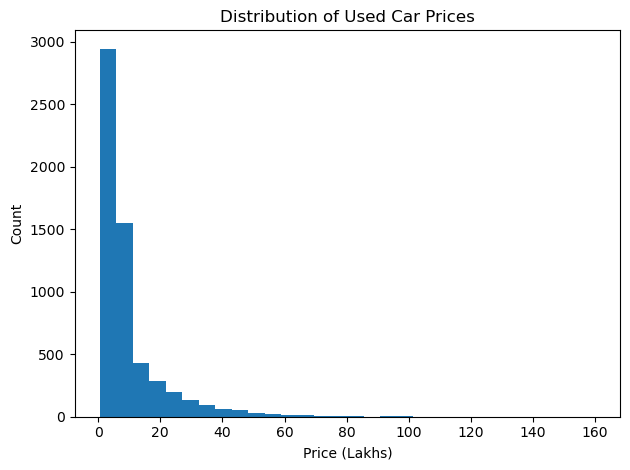

In [14]:

plt.figure()
plt.hist(df_encoded['Price'], bins=30)
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.title("Distribution of Used Car Prices")
plt.tight_layout()
plt.savefig("../results/price_histogram.png")
plt.show()


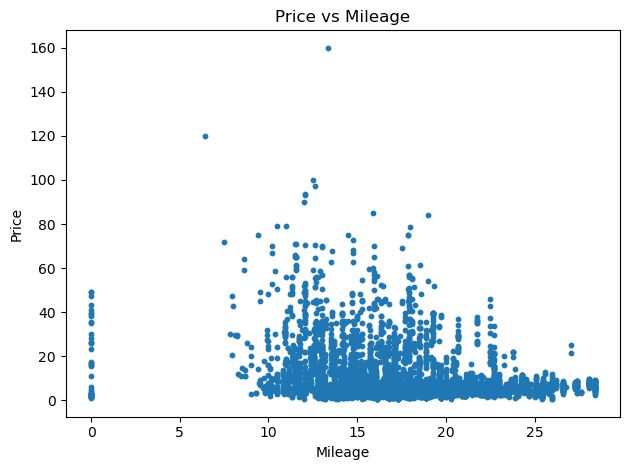

In [15]:
plt.figure()
plt.scatter(df_encoded['Mileage'], df_encoded['Price'], s=10)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage")
plt.tight_layout()
plt.savefig("../results/price_vs_mileage.png")
plt.show()



Report on Findings

This dataset contains information about used cars such as mileage, engine size, power, fuel type, transmission type, year, and selling price.
Before analyzing or modeling the data, it is very important to clean and preprocess it properly because many columns contain text units like “kmpl”, “bhp”, “CC”, or have missing values.

The goal of this section is to perform data cleaning and apply common data manipulation tasks such as selecting, filtering, renaming, mutating, arranging, and summarising — similar to what we do in R’s dplyr, but using Python pandas.
1. Handling Missing Values

I checked which columns had missing values.

Numeric columns were filled using median (less affected by outliers).

Categorical columns were filled using mode (most common category).

This keeps the dataset complete and consistent.

2. Removing Units

Columns like Mileage (“18 kmpl”), Engine (“1197 CC”), Power (“74 bhp”), and New Price (“5.34 Lakh”) contained text units.
I removed the units and kept only the numeric value so that the columns can be used for calculations.

3. One-Hot Encoding

Fuel_Type and Transmission are categorical.
I applied one-hot encoding to convert them into numeric 0/1 columns so the data can be used for analysis and modeling.

4. One-Hot Encoding

Fuel_Type and Transmission are categorical.
I applied one-hot encoding to convert them into numeric 0/1 columns so the data can be used for analysis and modeling.

5. Data Manipulation (dplyr style)

I demonstrated:

Select: choosing specific columns

Filter: selecting rows based on conditions

Rename: renaming columns

Mutate: creating new calculated columns

Arrange: sorting rows

Summarise: grouping and aggregating values

These steps improve data understanding and prepare it for analysis.